Step 1: Import Libraries and Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Step 2: Data Cleaning and Preprocessing
Handle missing values
Remove duplicates
Convert data types

In [ ]:
# Loading the dataset
url = '/content/AB_NYC_2019.csv'
data = pd.read_csv(url)

data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Checking for missing values
missing_values = data.isnull().sum()

missing_values

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Handling missing values
data.fillna(0, inplace=True)

# Removing duplicates
data.drop_duplicates(inplace=True)

# Converting data types
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0


Step 3: Understanding the Dataset
Check the structure of the dataset
Identify the different types of variables

In [ ]:
# Checking the structure of the dataset
data.info()

# Describing the numerical variables
print(data.describe())

# Checking the unique values in categorical variables
for col in data.select_dtypes('object'):
    print(col, data[col].unique())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  float64
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Step 4: Univariate Analysis
Distribution of numerical variables
Count of categorical variables

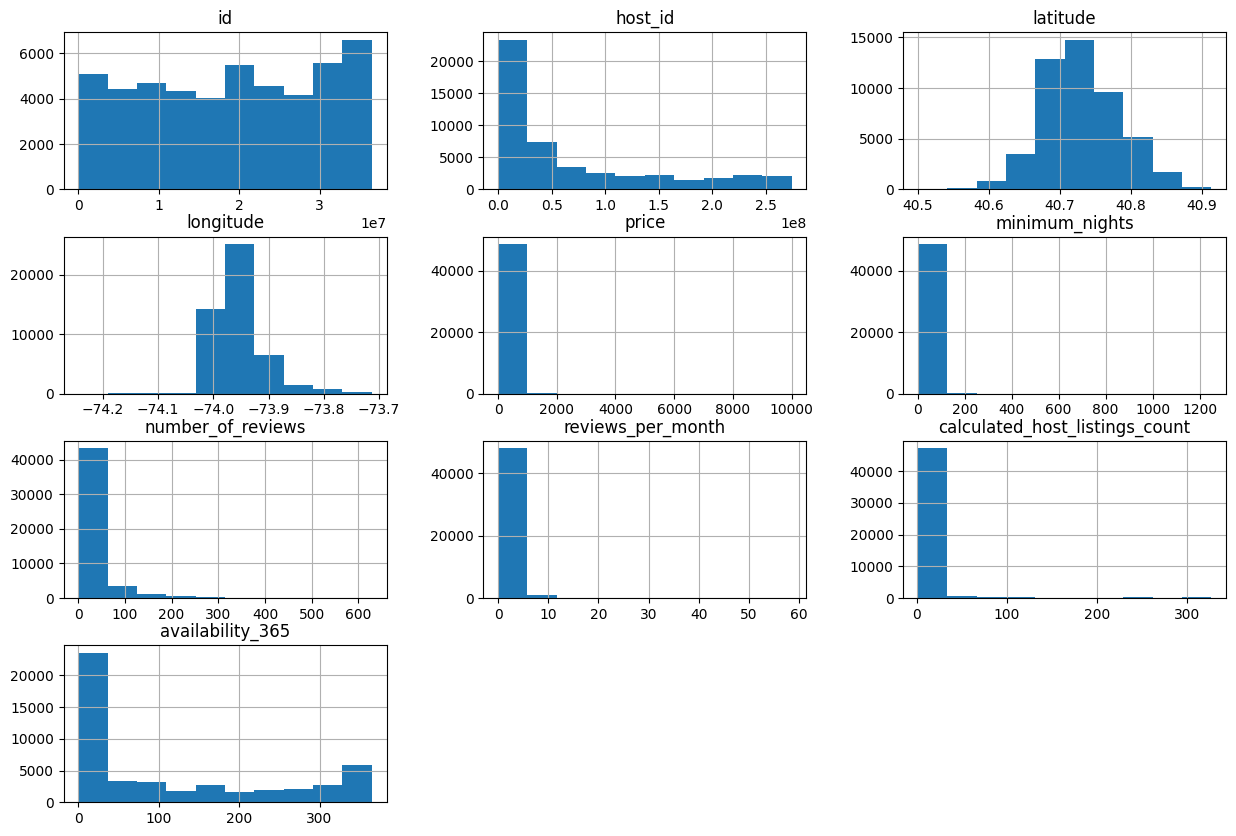

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27493 (\N{CJK UNIFIED IDEOGRAPH-6B65}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 34892 (\N{CJK UNIFIED IDEOGRAPH-884C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38047 (\N{CJK UNIFIED IDEOGRAPH-949F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21040 (\N{CJK UNIFIED IDEOGRAPH-5230}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

ValueError: ignored

<Figure size 1000x400 with 1 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32654 (\N{CJK UNIFIED IDEOGRAPH-7F8E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24503 (\N{CJK UNIFIED IDEOGRAPH-5FB7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38738 (\N{CJK UNIFIED IDEOGRAPH-9752}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26126 (\N{CJK UNIFIED IDEOGRAPH-660E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24120 (\N{CJK UNIFIED IDEOGRAPH-5E38}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

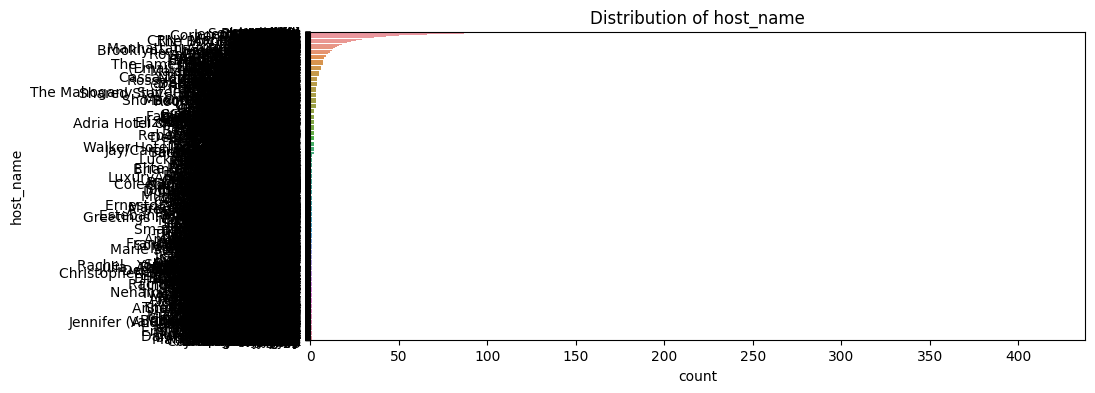

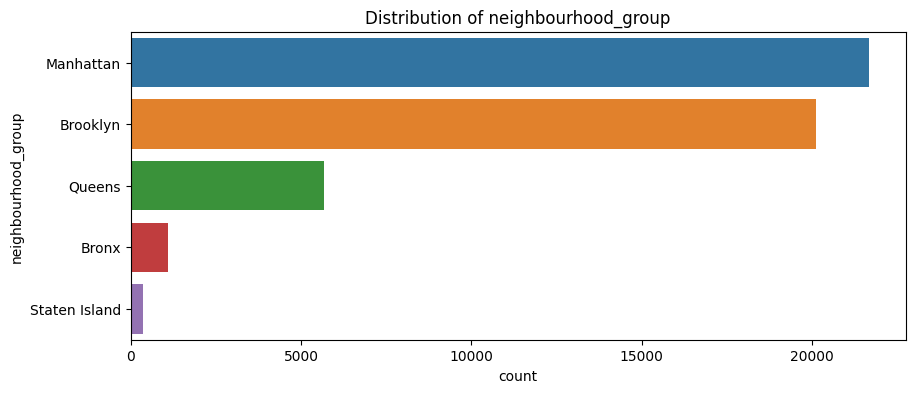

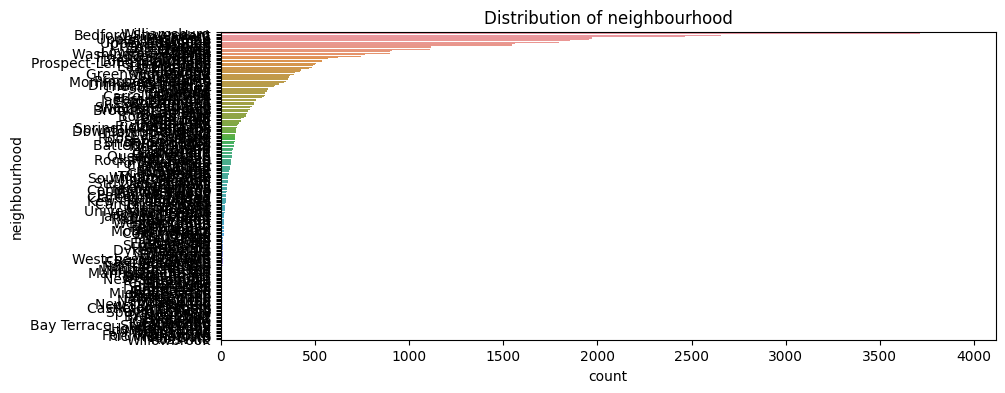

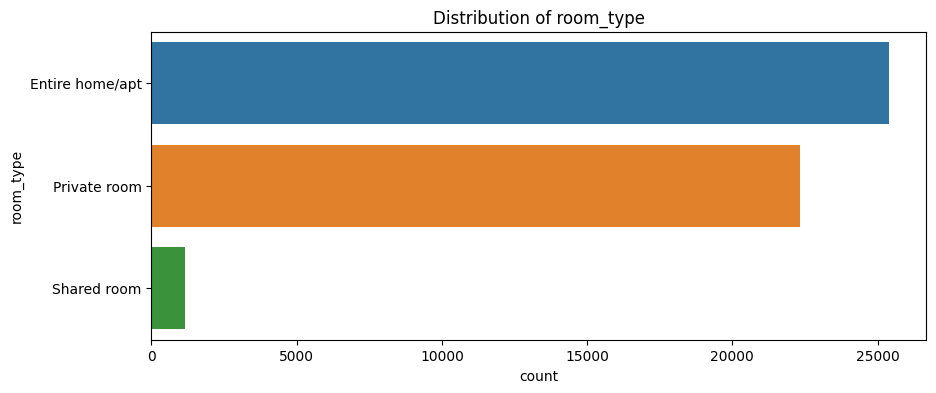

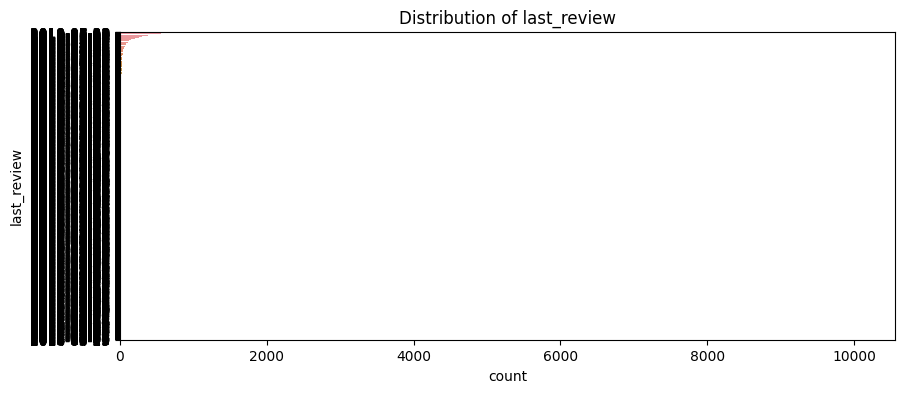

In [ ]:
# Distribution of numerical variables
num_vars = data.select_dtypes(include=['float64', 'int64']).columns
data[num_vars].hist(figsize=(15, 10))
plt.show()

# Count of categorical variables
cat_vars = data.select_dtypes(include=['object']).columns
for col in cat_vars:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=col, data=data, order = data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()


Step 5: Bivariate Analysis
Correlation between numerical variables
Relationship between numerical and categorical variables

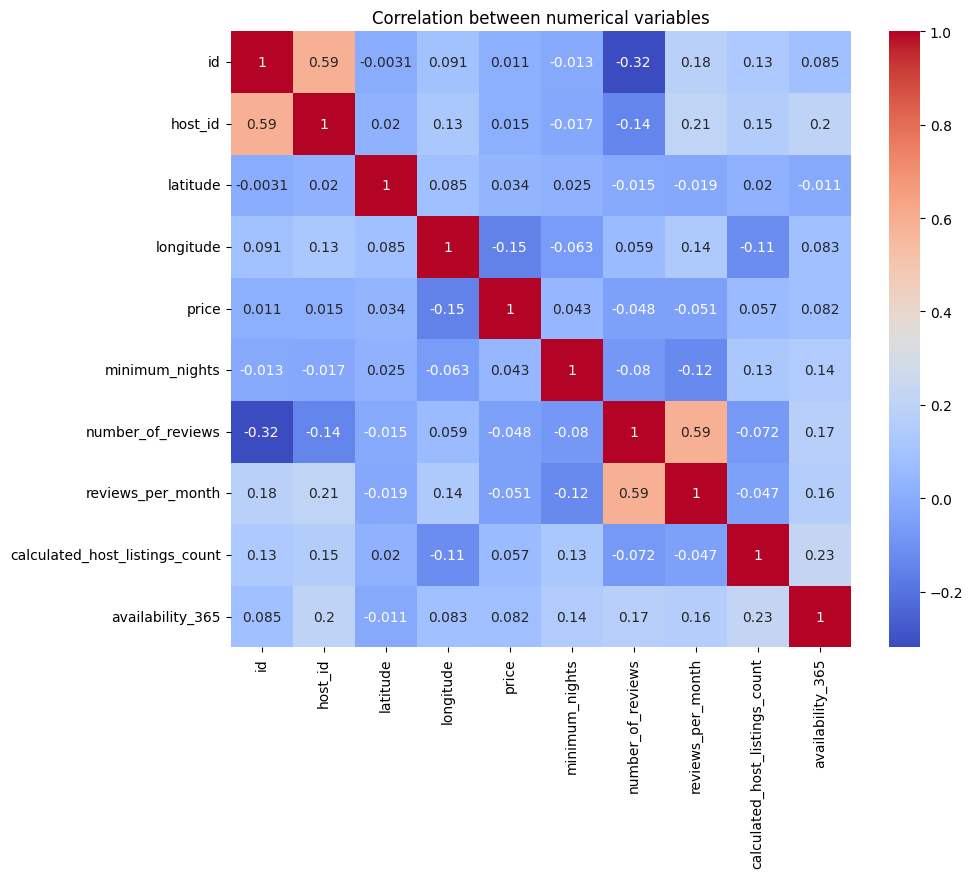

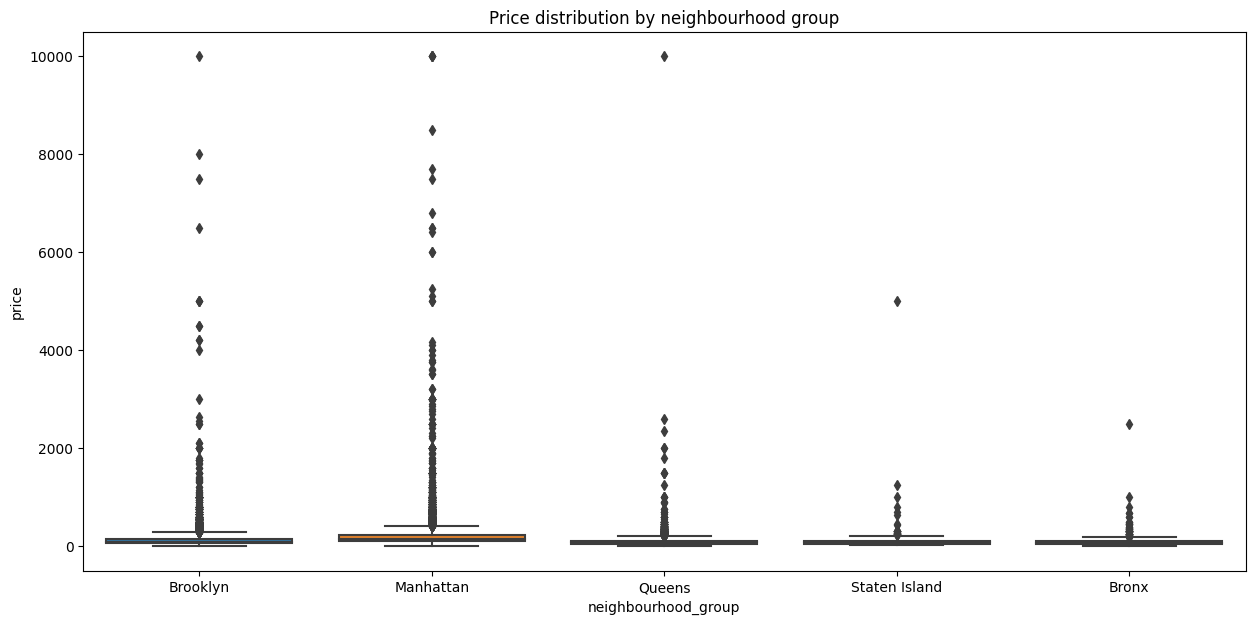

In [ ]:
# Correlation between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(data[num_vars].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between numerical variables')
plt.show()

# Relationship between numerical and categorical variables
plt.figure(figsize=(15, 7))
sns.boxplot(x='neighbourhood_group', y='price', data=data)
plt.title('Price distribution by neighbourhood group')
plt.show()


Step 6: Multivariate Analysis
Interactions between variables

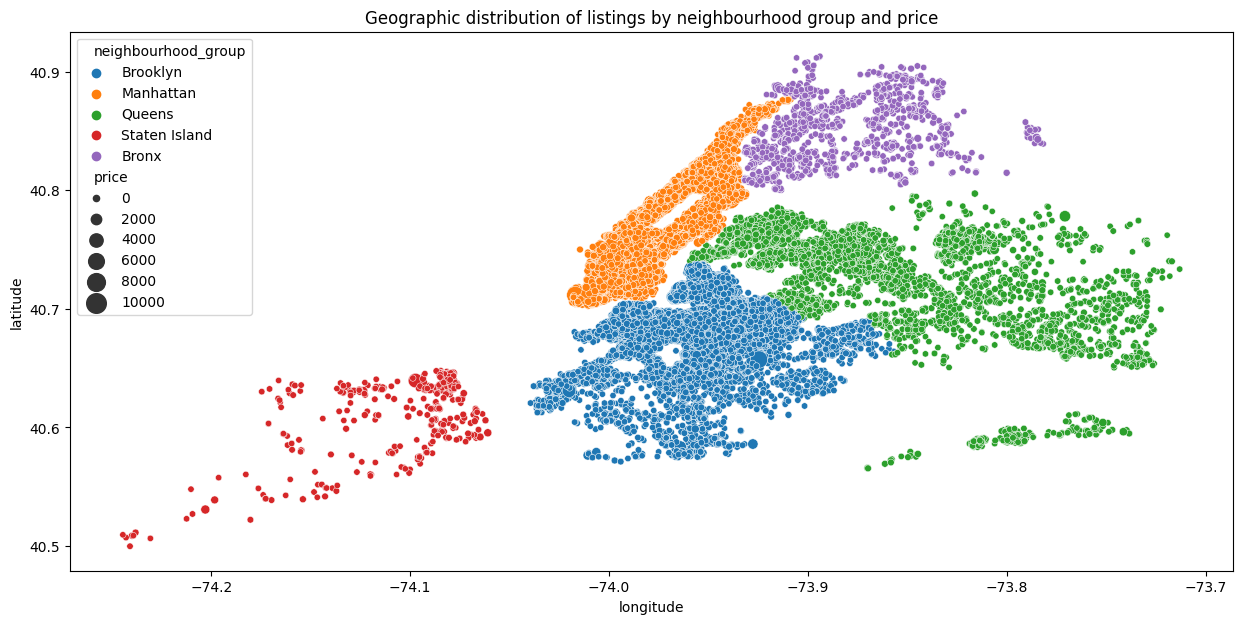

In [ ]:
# Interactions between variables
plt.figure(figsize=(15, 7))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', size='price', sizes=(20, 200), data=data)
plt.title('Geographic distribution of listings by neighbourhood group and price')
plt.show()


Step 7: Advanced D3.js Visualizations in Colab
For advanced D3.js visualizations, you can use the following approach:

Create your D3.js visualization in an HTML file.
Embed the HTML file in your Google Colab notebook using IPython.display.HTML.
Here is a simple example of embedding a D3.js bar chart in a Colab notebook:

In [ ]:
from IPython.core.display import display, HTML

# Your D3.js code
d3_code = """
<html>
  <head>
    <script src="https://d3js.org/d3.v5.min.js"></script>
  </head>
  <body>
    <script>
      var data = [{x: 30, y: 30}, {x: 50, y: 70}, {x: 90, y: 90}, {x: 130, y: 120}, {x: 170, y: 160}];

      var svg = d3.select('body').append('svg')
        .attr('width', 200)
        .attr('height', 200);

      var circles = svg.selectAll('circle')
        .data(data)
        .enter()
        .append('circle')
        .attr('cx', function(d) { return d.x; })
        .attr('cy', function(d) { return d.y; })
        .attr('r', 10)
        .attr('fill', 'steelblue');

      circles.on('mouseover', function(d) {
          d3.select(this).attr('fill', 'orange');
          svg.append('text')
            .attr('id', 'tooltip')
            .attr('x', d.x + 10)
            .attr('y', d.y)
            .text(`(${d.x}, ${d.y})`);
        })
        .on('mouseout', function() {
          d3.select(this).attr('fill', 'steelblue');
          d3.select('#tooltip').remove();
        });
    </script>
  </body>
</html>

"""

# Displaying the D3.js visualization in the Colab notebook
display(HTML(d3_code))


In [ ]:
from IPython.core.display import display, HTML

d3_code = """
<html>
  <head>
    <script src="https://d3js.org/d3.v5.min.js"></script>
  </head>
  <body>
    <script>
      var data = [30, 86, 168, 281, 303, 365];

      var svg = d3.select('body').append('svg')
        .attr('width', 400)
        .attr('height', 400);

      svg.selectAll('rect')
        .data(data)
        .enter()
        .append('rect')
        .attr('x', function(d, i) { return i * 60; })
        .attr('y', function(d) { return 400 - d; })
        .attr('width', 50)
        .attr('height', 0)
        .attr('fill', 'steelblue')
        .transition()
        .duration(2000)
        .attr('height', function(d) { return d; });
    </script>
  </body>
</html>

"""

display(HTML(d3_code))


In [ ]:
from IPython.core.display import display, HTML

d3_code = """
<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8">
<title>Interactive Bubble Chart</title>
<script src="https://d3js.org/d3.v5.min.js"></script>
</head>
<body>
<script>
var data = [
  {name: "A", value: 30},
  {name: "B", value: 70},
  {name: "C", value: 90},
  {name: "D", value: 120},
  {name: "E", value: 160}
];

var svg = d3.select("body").append("svg")
    .attr("width", 500)
    .attr("height", 500);

var color = d3.scaleOrdinal(d3.schemeCategory10);

var simulation = d3.forceSimulation(data)
    .force("x", d3.forceX(250).strength(0.05))
    .force("y", d3.forceY(250).strength(0.05))
    .force("collide", d3.forceCollide(function(d) { return d.value; }));

var bubbles = svg.selectAll("circle")
    .data(data)
    .enter()
    .append("circle")
    .attr("r", function(d) { return d.value; })
    .attr("fill", function(d) { return color(d.name); })
    .call(d3.drag()
      .on("start", dragStarted)
      .on("drag", dragged)
      .on("end", dragEnded));

simulation.nodes(data)
    .on("tick", ticked);

function ticked() {
  bubbles
    .attr("cx", function(d) { return d.x; })
    .attr("cy", function(d) { return d.y; });
}

function dragStarted(d) {
  if (!d3.event.active) simulation.alphaTarget(0.3).restart();
  d.fx = d.x;
  d.fy = d.y;
}

function dragged(d) {
  d.fx = d3.event.x;
  d.fy = d3.event.y;
}

function dragEnded(d) {
  if (!d3.event.active) simulation.alphaTarget(0);
  d.fx = null;
  d.fy = null;
}
</script>
</body>
</html>
"""

display(HTML(d3_code))
